# Bonus 1, hyperparameter tuning with Optuna

In [1]:
import sys
import os
import shutil

import pickle

import pandas as pd

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-1


In [2]:
from src.bonus1_optuna import pipeline_optuna
from src.regression_visualizations import (
    pretty_print_hyperparameters_optuna, plot_metrics_optuna
)

In [3]:
model_types = [
    "ElasticNet",
    "SVR",
    "BayesianRidge"
]

RANDOM_STATE = 42

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(BASE_DIR, "data")
MODELS_DIR = os.path.join(BASE_DIR, "models", "bonus1_optuna")
print(DATA_DIR)
print(MODELS_DIR)

/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-1/data
/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-1/models/bonus1_optuna


In [4]:
for model_type in model_types:
    # Copy features files to optuna models folder
    shutil.copy(
        "/".join(MODELS_DIR.split("/")[:-1]) + f"/{model_type}_features.txt",
        MODELS_DIR
    )

In [5]:
all_metrics = pipeline_optuna(
    models_dir=MODELS_DIR,
    dataset_dir=DATA_DIR
)

[I 2025-04-06 19:51:35,136] A new study created in memory with name: no-name-230314c8-0c47-4a2a-a7ea-e4d9723abaea


----------------
Running pipeline
----------------

--------------------
     ElasticNet     
--------------------
        tune        
--------------------
Training... 

  0%|          | 0/1000 [00:00<?, ?it/s]

Training completed
Validating... Validation completed

--------------------
        SVR         
--------------------
        tune        
--------------------
Training... 

  0%|          | 0/1000 [00:00<?, ?it/s]

Training completed
Validating... Validation completed

--------------------
   BayesianRidge    
--------------------
        tune        
--------------------
Training... 

  0%|          | 0/1000 [00:00<?, ?it/s]

Training completed
Validating... Validation completed

------------------
Pipeline completed
------------------



In [6]:
print(pretty_print_hyperparameters_optuna(all_metrics))

------------------------------
          ElasticNet          
------------------------------
alpha                0.1185039
l1_ratio             0.7783844
tol                  0.0010000
------------------------------
             SVR              
------------------------------
kernel                     rbf
degree                       4
gamma                    scale
coef0                0.9345290
C                    1.6342117
epsilon              0.9278812
tol                  0.0000001
------------------------------
        BayesianRidge         
------------------------------
alpha_1              0.0000000
alpha_2              0.0006515
lambda_1             0.0009999
lambda_2             0.0000000
tol                  0.0000001
compute_score                1



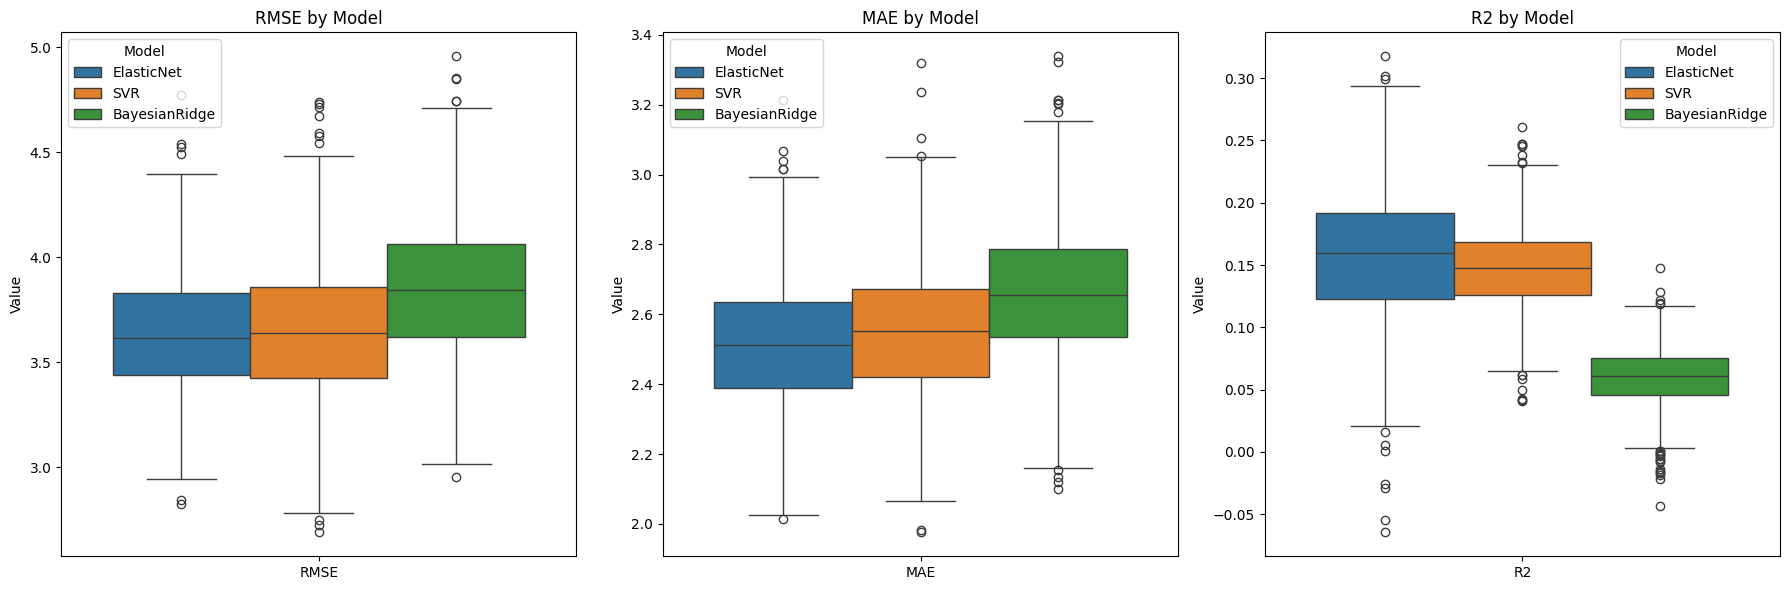

In [7]:
plot_metrics_optuna(all_metrics)